# Medical Insurance Premium Prediction

## Introduction
This project is regarding the prediction of Medical Insurance Premium using the Machine Learning Algorithms. In the data we have some features which impacts the Insurance premium. Project contains a basic EDA and Machine learning techniques namely- 
* Linear Regression
* Lasso Regression
* Ridge Regression
* Decision Tree Regressor
* K-Neighbor Regressor
* Support Vector Machine
* Random Forest Regressor
* Gradient Boosting and 
* Stacking

The framework is like we inducted data with all the algorithms above in a loop and then the best performing ones are selected for the final output. And then the two best stacked together using Stacking so that we can optimize results at best.

In [1]:
## fundamental libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')

## Data and Pre-processing

In [2]:
df= pd.read_csv('Medicalpremium.csv')
print('Shape of data is {}'.format(df.shape))
print('\n')
print('DataTypes- ','\n',df.dtypes.value_counts())
df.head()

Shape of data is (986, 11)


DataTypes-  
 int64    11
dtype: int64


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
df.columns.tolist()

['Age',
 'Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'Height',
 'Weight',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries',
 'PremiumPrice']

In [4]:
print('Number of Null values- ','\n',df.isnull().sum())
print('\n')
print('Number of Duplicated rows- ',df.duplicated().sum())

Number of Null values-  
 Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


Number of Duplicated rows-  0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.0,0.0,1.0,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.0,0.0,1.0,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.0,0.0,0.0,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.0,0.0,0.0,1.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.0,0.0,0.0,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.0,0.0,0.0,1.0
NumberOfMajorSurgeries,986.0,0.667343,0.749205,0.0,0.0,1.0,1.0,3.0


In [6]:
uniq_vals= df.nunique().sort_values(ascending=False)
uniq_vals

Weight                     74
Age                        49
Height                     44
PremiumPrice               24
NumberOfMajorSurgeries      4
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
KnownAllergies              2
HistoryOfCancerInFamily     2
dtype: int64

##  Defining an EDA Function
This function takes one argument and that argument could be any feature from data and it will give us a bar representation of how that feature impacts Average premium Price.

In [7]:
def eda_bar_results(x):
    res= (df[[x,'PremiumPrice']].groupby(x)).mean('PremiumPrice')
    ax= res.plot(kind='bar',figsize=(12,6))
    ax.set(xlabel=x, ylabel= 'Average Premium')
    ax.get_legend().remove();
    return ax    

### 1. Average Premium compared to Number of Surgeries

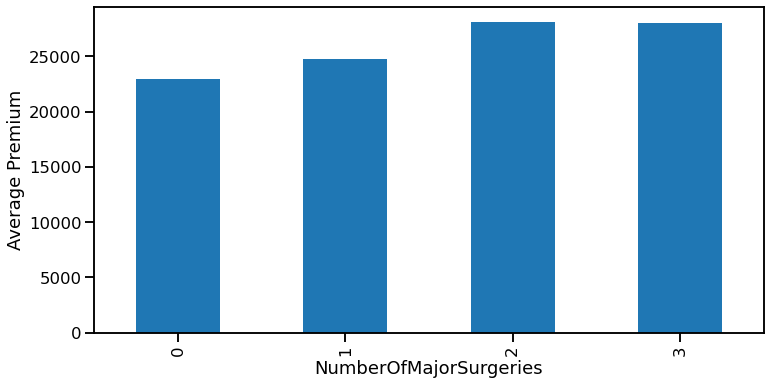

In [8]:
eda_bar_results('NumberOfMajorSurgeries');

### 2.  Cancer in family background 

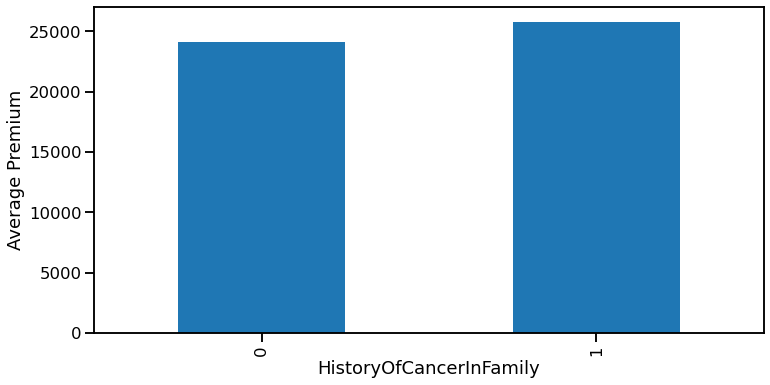

In [9]:
eda_bar_results('HistoryOfCancerInFamily');

### 3. Diabetic Conditions impact on Premium

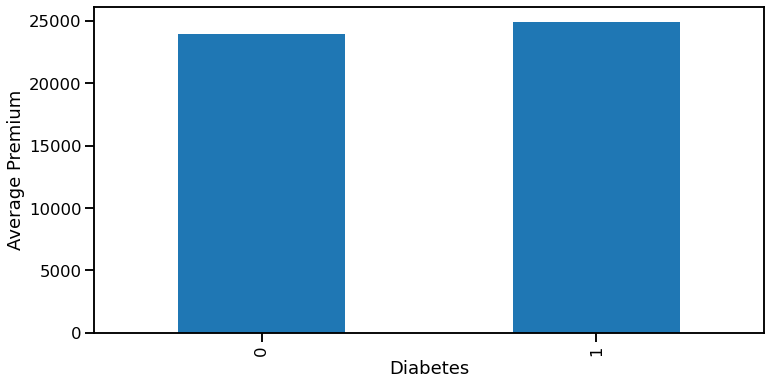

In [10]:
eda_bar_results('Diabetes');

### 4.  Impact of Blood Pressure problems

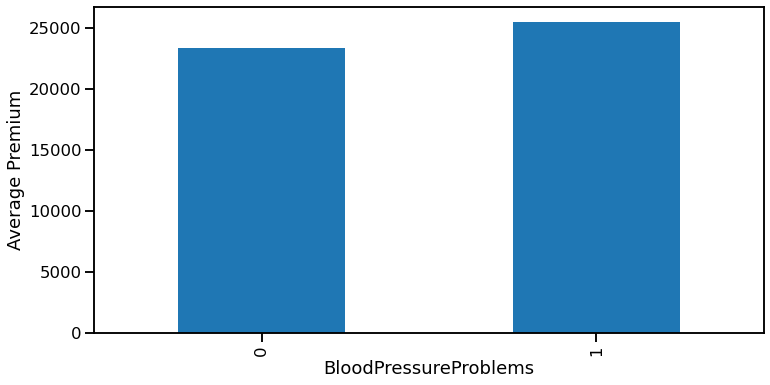

In [11]:
eda_bar_results('BloodPressureProblems');

### 5.  Average Premium compared to Age

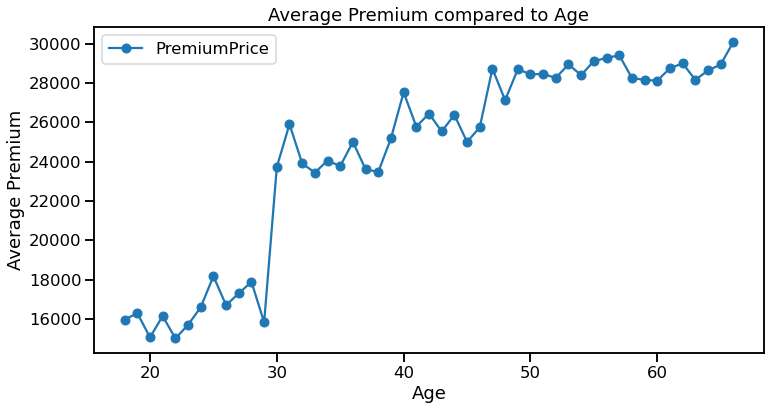

In [12]:
premium_age= (df[['Age','PremiumPrice']].groupby('Age')).mean('PremiumPrice')
ax= premium_age.plot(marker='o',figsize=(12,6))
ax.set(xlabel= 'Age',
      ylabel= 'Average Premium',title= 'Average Premium compared to Age');

### 6.  Does weight matter?

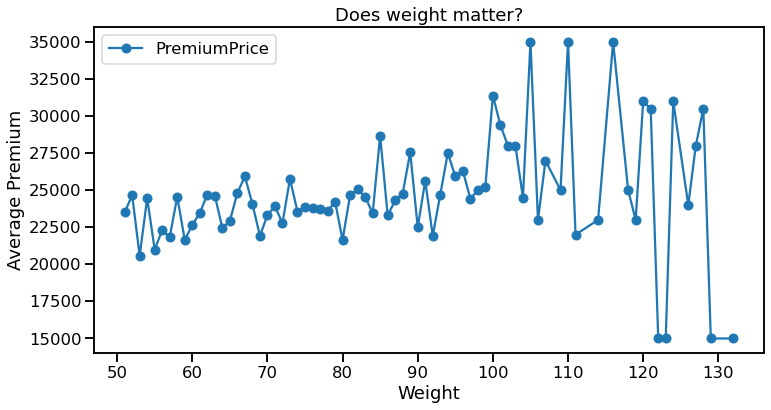

In [13]:
weight_impact= (df[['Weight','PremiumPrice']].groupby('Weight')).mean('PremiumPrice')
ax= weight_impact.plot(marker='o',figsize=(12,6))
ax.set(xlabel= 'Weight',
      ylabel= 'Average Premium',title= 'Does weight matter?');

With the EDA, we have an idea that these features somehow impact the premium. The person who is strugggling with these problems have a higher average premium price compared to ones which are not.

## Feature Engineering 

In [14]:
unq_vals= df.nunique().sort_values(ascending=False)
unq_vals

Weight                     74
Age                        49
Height                     44
PremiumPrice               24
NumberOfMajorSurgeries      4
Diabetes                    2
BloodPressureProblems       2
AnyTransplants              2
AnyChronicDiseases          2
KnownAllergies              2
HistoryOfCancerInFamily     2
dtype: int64

In [15]:
num_cols= (unq_vals[unq_vals>2]).index
num_cols

Index(['Weight', 'Age', 'Height', 'PremiumPrice', 'NumberOfMajorSurgeries'], dtype='object')

## Skewness ond Outliers in data

In [16]:
df[num_cols].skew().sort_values(ascending=False)

NumberOfMajorSurgeries    0.861334
Weight                    0.666726
PremiumPrice              0.097639
Age                       0.029895
Height                   -0.179788
dtype: float64

### IQR Method to detect outliers

####  Premium Price

In [17]:
q1,q3= np.percentile(df['PremiumPrice'],[25,75])
print(q1,q3)

21000.0 28000.0


In [18]:
iqr= q3- q1
lower_bound= q1-(1.5*iqr)
upper_bound= q3+(1.5*iqr)
print(lower_bound, upper_bound)

10500.0 38500.0


In [19]:
total_outl= df[(df['PremiumPrice']>upper_bound)|(df['PremiumPrice']<lower_bound)]

In [20]:
df_new= df.drop(total_outl.index,axis=0)
df.shape,df_new.shape

((986, 11), (980, 11))

In [21]:
df_new.to_csv('med_prm_pro.csv',index=False)

Outliers have been removed successfully and we have restored results into a new dataframe. We will use that new data in further procedure.

## Correlation

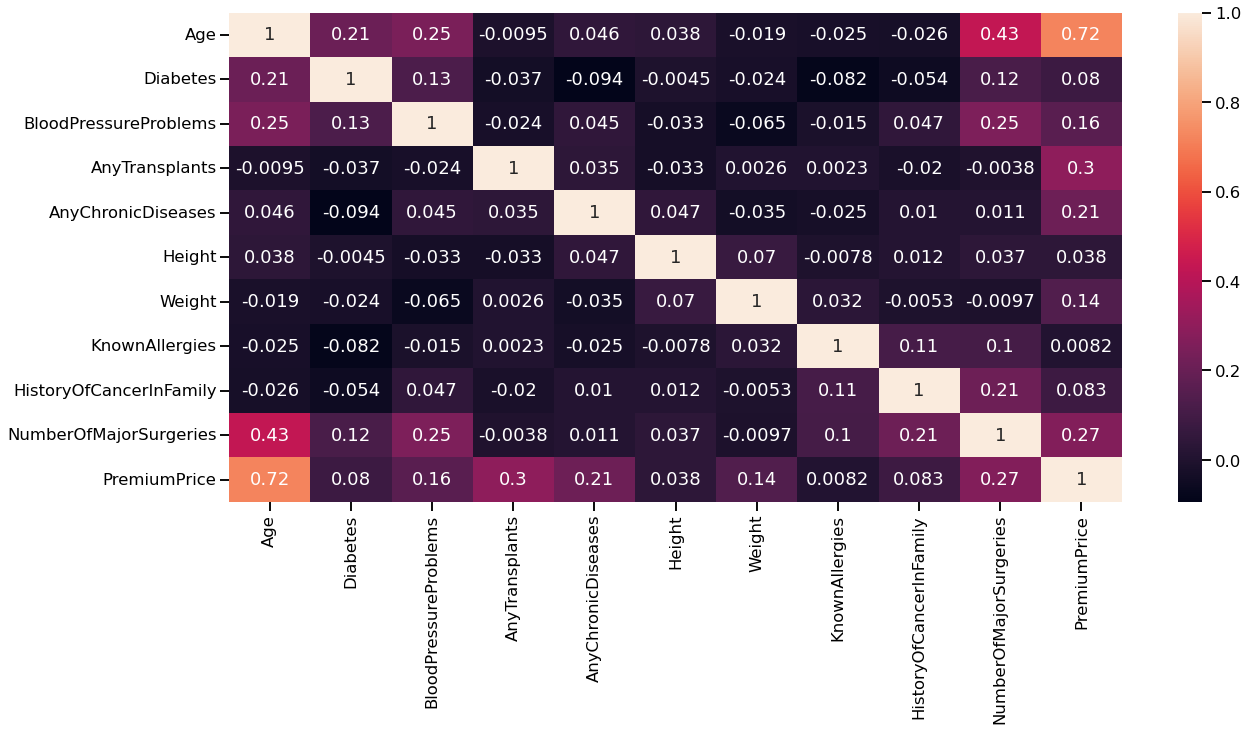

In [22]:
plt.figure(figsize= (20,9))
sns.heatmap(df_new.corr(), annot=True);

### Correlation between Independent and Dependent column

In [23]:
feat_cols= [i for i in df_new.columns if i not in 'PremiumPrice']
target_col= 'PremiumPrice'

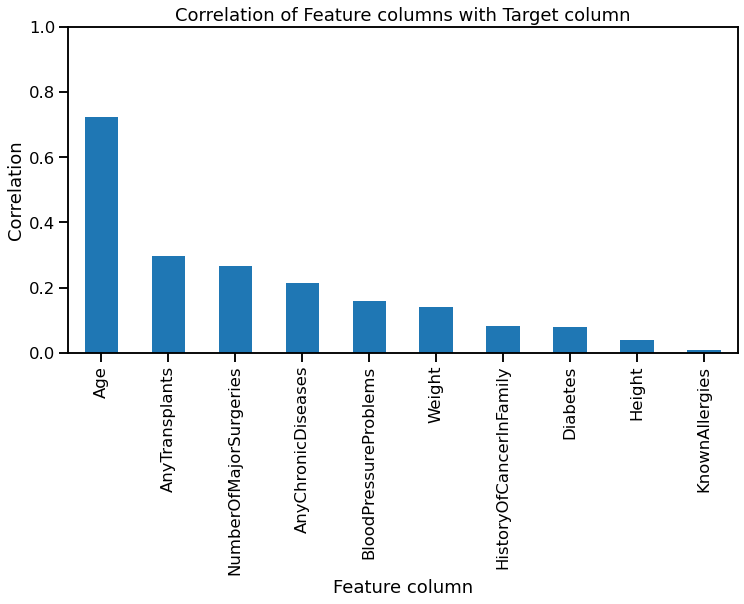

In [24]:
corr_df= df_new[feat_cols].corrwith(df_new[target_col]).sort_values(ascending=False)
ax= corr_df.plot(kind='bar', figsize=(12,6))
ax.set(xlabel='Feature column',
      ylabel= 'Correlation',
      title= 'Correlation of Feature columns with Target column',
      ylim= [0,1]);

## Machine Learning

### Data split into Training and Testing set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x= df_new.drop('PremiumPrice',axis=1)
y= df_new['PremiumPrice']

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state= 42)

### Model Development

In [27]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [28]:
lr= LinearRegression()
las= LassoCV(alphas=[0.001,0.01, 0.1, 0.5, 1, 3, 5, 8, 10, 20],max_iter=1000,cv=4)
rdg= RidgeCV(alphas=[0.001,0.01, 0.1, 0.5, 1, 3, 5, 8, 10, 20],cv=4)
rf= RandomForestRegressor()
knn= KNeighborsRegressor(n_neighbors=5)
gbr= GradientBoostingRegressor()
svm= LinearSVR()
dtr= DecisionTreeRegressor()

In [29]:
model= [lr, las, rdg, rf, dtr, knn, gbr, svm]
label= ['lin_reg','lasso','ridge','random_forest','decision_tree','knn','gradient_boost','svm']

r2_score_lst= []

for mod, lab in zip(model,label):
    mod.fit(x_train, y_train)
    y_pred= mod.predict(x_test)
    r2_score_lst.append(pd.Series({'r2_score':r2_score(y_test, y_pred)},name=lab))
    
results= pd.concat(r2_score_lst, axis=1).T    

### Model Evaluation

In [30]:
results= results.sort_values(by='r2_score',ascending=False)
results

,r2_score
random_forest,0.829277
gradient_boost,0.814530
decision_tree,0.715901
lin_reg,0.657055
lasso,0.656520
ridge,0.656204
knn,0.612751
svm,0.517965


## How models are performing- A Bar Plot

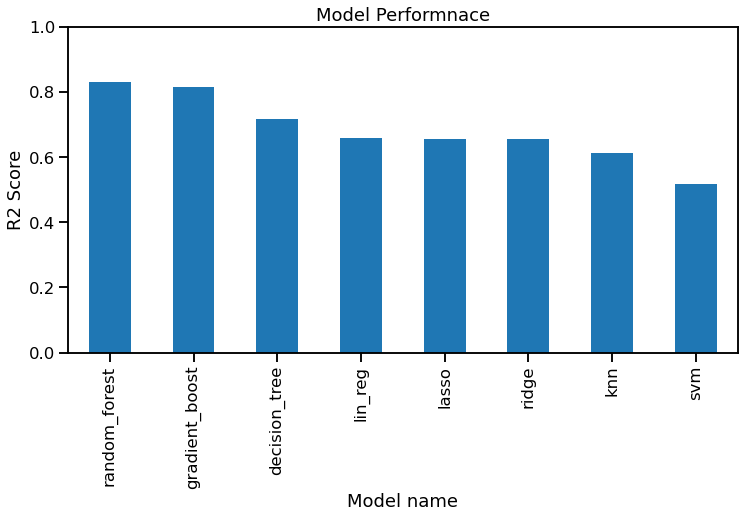

In [31]:
ax= results.plot(kind='bar',figsize=(12,6))
ax.set(xlabel='Model name',ylabel='R2 Score',title= 'Model Performnace',ylim=[0.0,1.0])
ax.get_legend().remove();

It is clear that Random forest and Gradient Boosting are outperforming other models. Hence we will go with them and equip them with the best hyper-parameters to optimize them at max.

### Best Hyperparameters for Random Forest Model

In [32]:
n_tr= [20, 40, 70, 100, 150, 200, 260, 300, 350, 400, 450, 500]
r_sco= []

for n in n_tr:
    rf2= RandomForestRegressor(n_estimators=n).fit(x_train, y_train)
    y_pr= rf2.predict(x_test)
    r_sco.append(pd.Series({'n_trees':n,
                           'r2_score':r2_score(y_test, y_pr)}))
    
score= pd.concat(r_sco, axis=1).T
score= score.sort_values(by='r2_score',ascending=False) 

    n_trees  r2_score
3     100.0  0.831462
4     150.0  0.829341
2      70.0  0.829281
10    450.0  0.828654
8     350.0  0.828033
9     400.0  0.827997
6     260.0  0.827841
7     300.0  0.827433
11    500.0  0.827074
5     200.0  0.825795
0      20.0  0.819991
1      40.0  0.819447


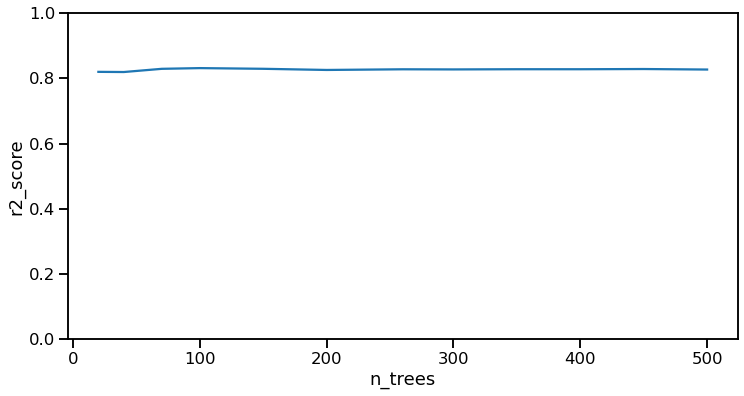

In [33]:
print(score)

plt.figure(figsize=(12,6))
ax= sns.lineplot(x=score['n_trees'], y=score['r2_score'])
ax.set(ylim=[0.0,1.0]);

In [34]:
from sklearn.model_selection import GridSearchCV 

In [35]:
params= {
    'max_features':range(1,len(rf.feature_importances_)+1)
    
}

gs_rf= GridSearchCV(estimator=RandomForestRegressor(n_estimators=200),
                   param_grid=params,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error',
                   cv=6).fit(x_train, y_train)

In [36]:
y_pred= gs_rf.predict(x_test)
print('R2 Score- ', r2_score(y_test, y_pred))

R2 Score-  0.8284938692240622


In [37]:
print('Best Estimator- ', gs_rf.best_estimator_)

Best Estimator-  RandomForestRegressor(max_features=9, n_estimators=200)


### Appropriate number of trees for Gradient boosting

In [38]:
ns= [15, 20, 40, 50, 80, 100,120,150,200,250,300, 400, 450, 500]
r2_sco= []
for n in ns:
    gbr2= GradientBoostingRegressor(n_estimators= n).fit(x_train, y_train)
    y_pred= gbr2.predict(x_test)
    r2_sco.append(pd.Series({'n_est':n,
                            'r2_score':r2_score(y_test, y_pred)}))
    
r2_sc= pd.concat(r2_sco,axis=1).T.set_index('n_est').sort_values(by='r2_score',ascending=False)   

       r2_score
n_est          
50.0   0.820861
40.0   0.820505
80.0   0.815820
100.0  0.813602
120.0  0.813172
150.0  0.810313
200.0  0.806473
300.0  0.805866
250.0  0.805201
400.0  0.798899
450.0  0.796667
500.0  0.792906
20.0   0.791270
15.0   0.757244


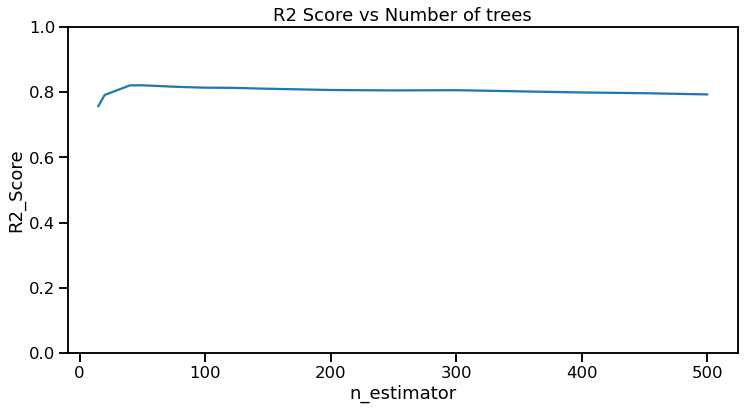

In [39]:
print(r2_sc)

plt.figure(figsize=(12,6))
ax= sns.lineplot(x= r2_sc.index, y= r2_sc['r2_score'])
ax.set(xlabel= 'n_estimator', 
         ylabel= 'R2_Score', 
         title= 'R2 Score vs Number of trees', 
         ylim=[0,1]);

In [41]:
params= {
    'max_features':range(1,len(gbr.feature_importances_)+1),
   
    'alpha':[0.001,0.01,0.1,0.5,0.9,1,3,5,10]
}

gs_gbr= GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=50),
                   param_grid=params,
                   n_jobs=-1,
                   scoring='neg_mean_squared_error',
                   cv=6).fit(x_train, y_train)

In [42]:
y_pred= gs_gbr.predict(x_test)
print('Best Estimator- ', gs_gbr.best_estimator_)
print('R2 Score- ', r2_score(y_test, y_pred))

Best Estimator-  GradientBoostingRegressor(alpha=0.01, max_features=9, n_estimators=50)
R2 Score-  0.8194279577652503


## Stacking

In [43]:
from sklearn.ensemble import VotingRegressor

In [44]:
estimator= [('rf',gs_rf),('gb',gs_gbr)]
vr= VotingRegressor(estimators=estimator).fit(x_train,y_train)
y_pred5= vr.predict(x_test)
r2_score(y_test, y_pred5)

0.8361178521245062

We concluded that the result of all three models are nearby as stacking is not optimizing results significantly. Hence we can continue without performing stacking as well as it is not impacting results with a noticeable change.

## A Plot showing results of Random Forest, Gradient Boosting and Stacking-

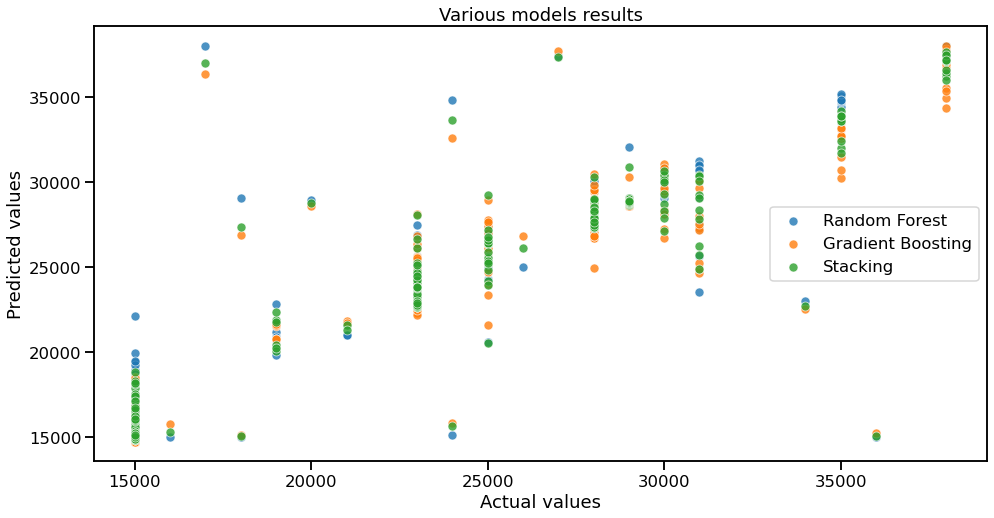

In [46]:
plt.figure(figsize=(16,8))
models=[gs_rf, gs_gbr, vr]
labels= ['Random Forest', 'Gradient Boosting', 'Stacking']

for mod, lab in zip(models,labels):
     ax= sns.scatterplot(x= y_test, y= mod.predict(x_test),legend=True, alpha= 0.8)
     ax.set(xlabel='Actual values',
          ylabel='Predicted values',
          title= 'Various models results')

plt.legend(labels,loc=,frameon=True);           